<a href="https://colab.research.google.com/github/MFarisA/Data-Mining/blob/main/data_mining_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/campuss/data-mining/dataKasus-1.xlsx'


Mounted at /content/drive


In [ ]:
# Step 1: Import Libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Load the Excel File
file_path = '/content/drive/MyDrive/campuss/data-mining/dataKasus-1.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Step 4: Data Preprocessing
# Drop irrelevant columns
data_clean = data.drop(columns=["NO", "NAMA", "Unnamed: 12"])

# Convert "USIA" to numeric values (remove " TH" and handle missing values)
data_clean['USIA'] = data_clean['USIA'].str.replace(" TH", "")  # Remove " TH"
data_clean['USIA'] = pd.to_numeric(data_clean['USIA'], errors='coerce')  # Convert to numeric
median_age = data_clean['USIA'].median()  # Calculate median age
data_clean['USIA'].fillna(median_age, inplace=True)  # Fill missing values with median age

# Encode categorical columns using one-hot encoding
categorical_columns = data_clean.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data_clean, columns=categorical_columns, drop_first=True)

# Step 5: Separate Features and Target
# "PE/Non PE_PE" is the encoded column indicating "PE" presence
X = data_encoded.drop(columns=["PE/Non PE_PE"])  # Features
y = data_encoded["PE/Non PE_PE"]  # Target

# Step 6: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
report = classification_report(y_test, y_pred)
print(report)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       107
        True       0.67      0.33      0.44         6

    accuracy                           0.96       113
   macro avg       0.82      0.66      0.71       113
weighted avg       0.95      0.96      0.95       113



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Column Names:
['NO', 'NAMA', 'USIA', 'PARITAS', 'JARAK KELAHIRAN', 'RIW HIPERTENSI', 'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA', 'SOSEK RENDAH', 'PE/Non PE', 'Unnamed: 12']
First 5 rows of the dataset:
   NO    NAMA   USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE OBESITAS  \
0   1  NAMA 1  23 TH        3       < 2 tahun          Tidak  Tidak    Tidak   
1   2  NAMA 2  29 TH        2       < 2 tahun          Tidak    PEB    Tidak   
2   3  NAMA 3  20 TH        1    anak pertama          Tidak  Tidak    Tidak   
3   4  NAMA 4  18 TH        1    anak pertama          Tidak  Tidak    Tidak   
4   5  NAMA 5  34 TH        3      > 2 tahun           Tidak  Tidak    Tidak   

  RIW DM RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE Unnamed: 12  
0     Ya                            Tidak         >UMR    Non PE         NaN  
1  Tid

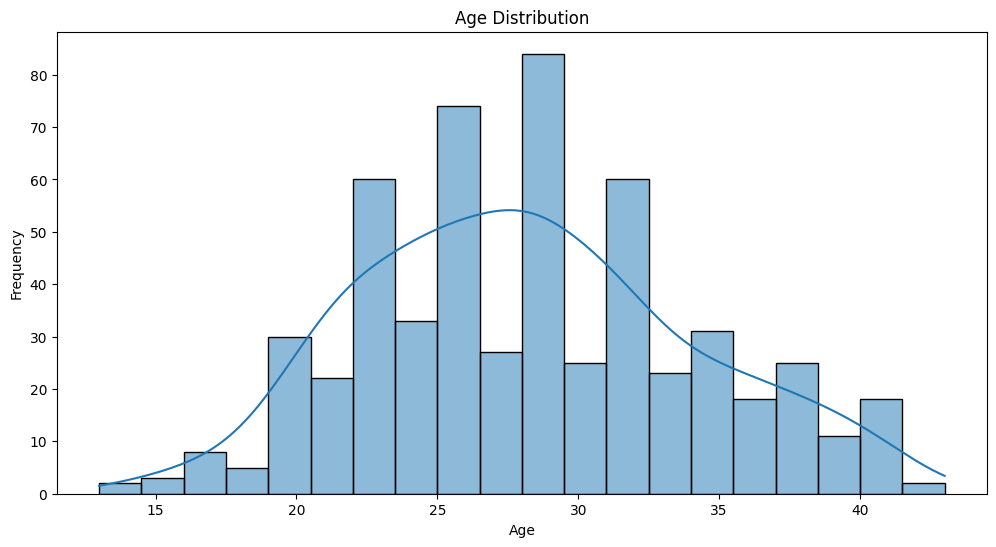

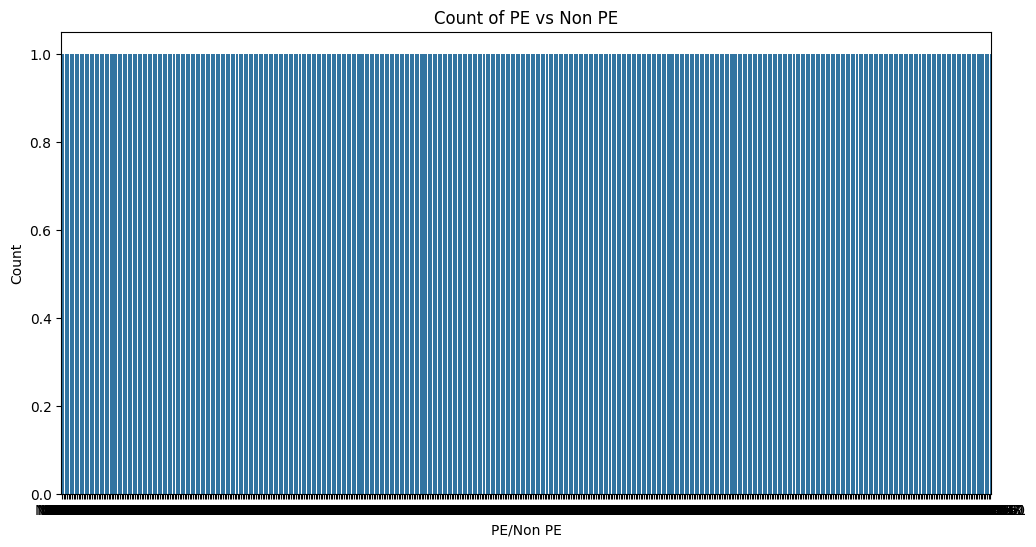

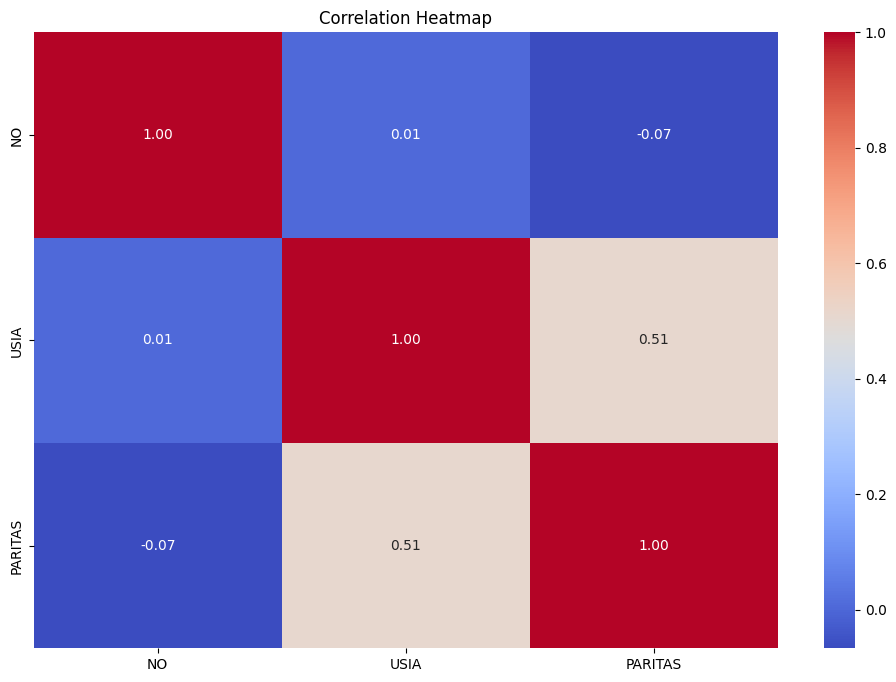

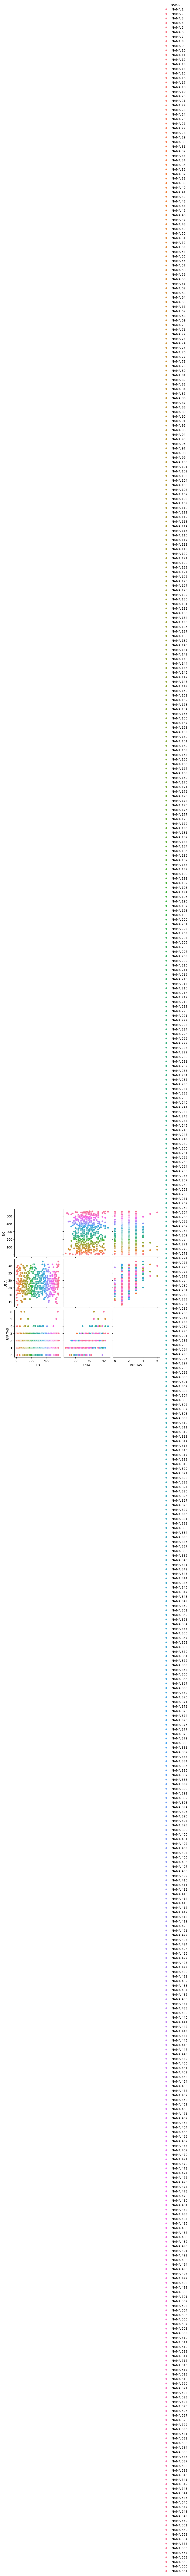

In [ ]:
# Step 1: Import Libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Load the Excel File
file_path = '/content/drive/MyDrive/campuss/data-mining/dataKasus-1.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Check the actual column names
print("Column Names:")
print(data.columns.tolist())

# Step 4: Basic Data Overview
print("First 5 rows of the dataset:")
print(data.head())
print("\nData Description:")
print(data.describe(include='all'))
print("\nData Info:")
print(data.info())

# Step 5: Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Step 6: Handle Missing Values for USIA
# Define a function to clean the USIA data
def clean_age(value):
    if isinstance(value, str):  # Ensure the value is a string
        value = value.lower()  # Convert to lowercase to standardize
        value = value.replace(" th", "").replace(" th ", "").strip()  # Remove " th" and strip whitespace
    return pd.to_numeric(value, errors='coerce')  # Convert to numeric, turn non-convertible to NaN

# Apply the cleaning function
data['USIA'] = data['USIA'].apply(clean_age)

# Fill NaNs with the median age
median_age = data['USIA'].median()  # Calculate median age
data['USIA'].fillna(median_age, inplace=True)  # Fill NaNs with median

# Visualize the distributions of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(data['USIA'], bins=20, kde=True)  # Plot the cleaned USIA data
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 7: Count Plot for Categorical Features
# Make sure to replace 'Correct_Column_Name' with the actual column name
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='NAMA')  # Adjust this based on your target variable
plt.title('Count of PE vs Non PE')
plt.xlabel('PE/Non PE')
plt.ylabel('Count')
plt.show()

# Step 8: Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Pairplot to Explore Relationships
sns.pairplot(data, hue='NAMA')  # Replace with the appropriate categorical target
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Column Names:
['NO', 'NAMA', 'USIA', 'PARITAS', 'JARAK KELAHIRAN', 'RIW HIPERTENSI', 'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA', 'SOSEK RENDAH', 'PE/Non PE', 'Unnamed: 12']
First 5 rows of the dataset:
   NO    NAMA   USIA  PARITAS JARAK KELAHIRAN RIW HIPERTENSI RIW PE OBESITAS  \
0   1  NAMA 1  23 TH        3       < 2 tahun          Tidak  Tidak    Tidak   
1   2  NAMA 2  29 TH        2       < 2 tahun          Tidak    PEB    Tidak   
2   3  NAMA 3  20 TH        1    anak pertama          Tidak  Tidak    Tidak   
3   4  NAMA 4  18 TH        1    anak pertama          Tidak  Tidak    Tidak   
4   5  NAMA 5  34 TH        3      > 2 tahun           Tidak  Tidak    Tidak   

  RIW DM RIW HIPERTENSI/PE DALAM KELUARGA SOSEK RENDAH PE/Non PE Unnamed: 12  
0     Ya                            Tidak         >UMR    Non PE         NaN  
1  Tid

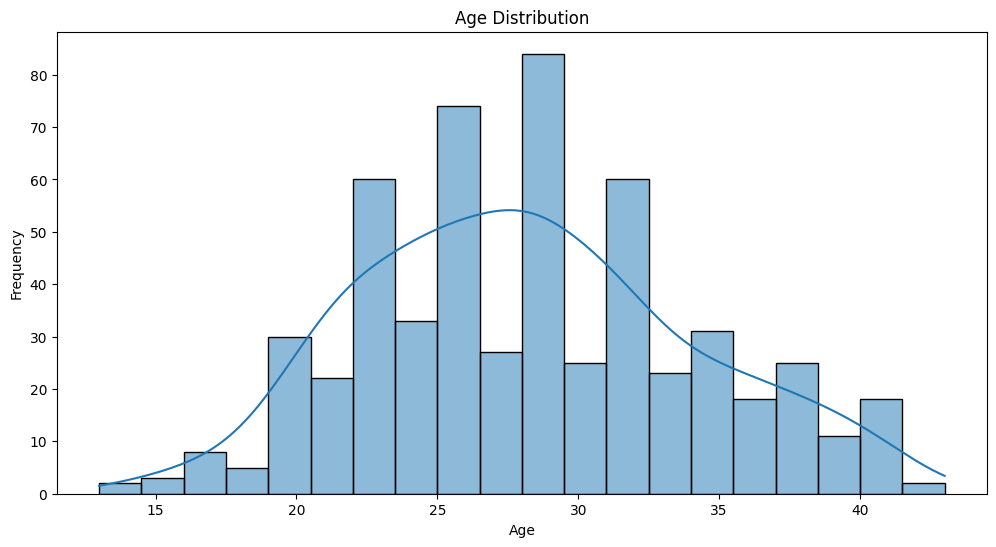

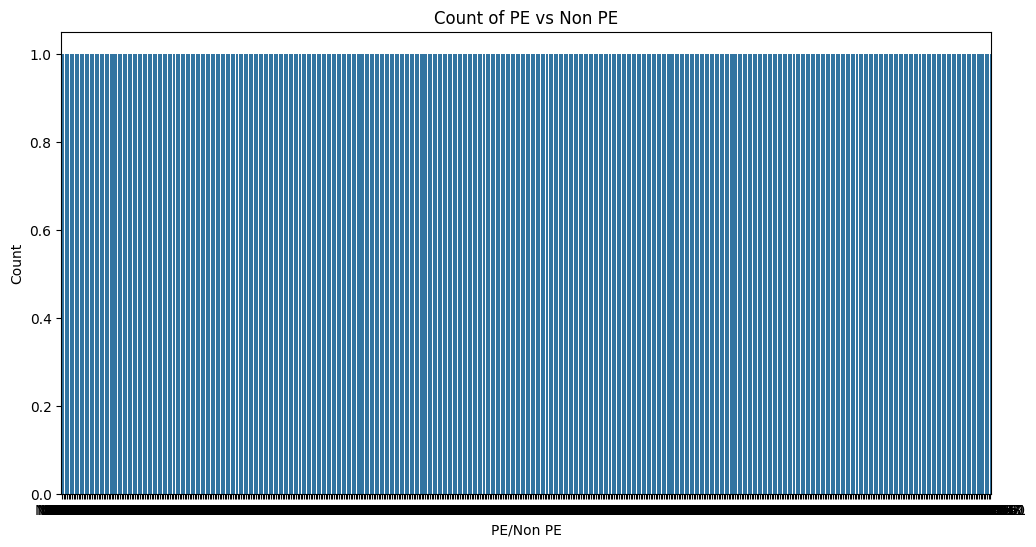

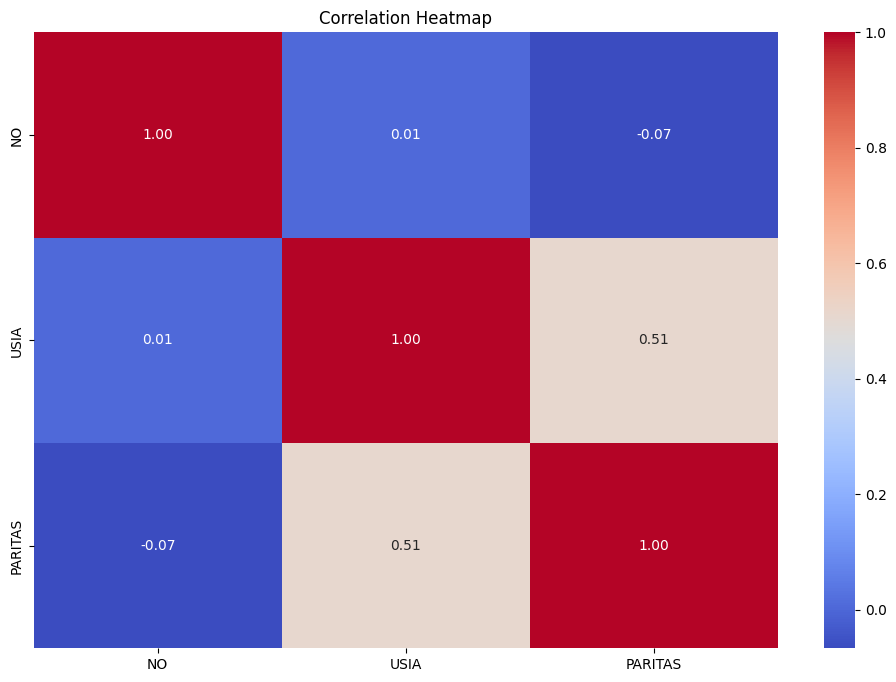

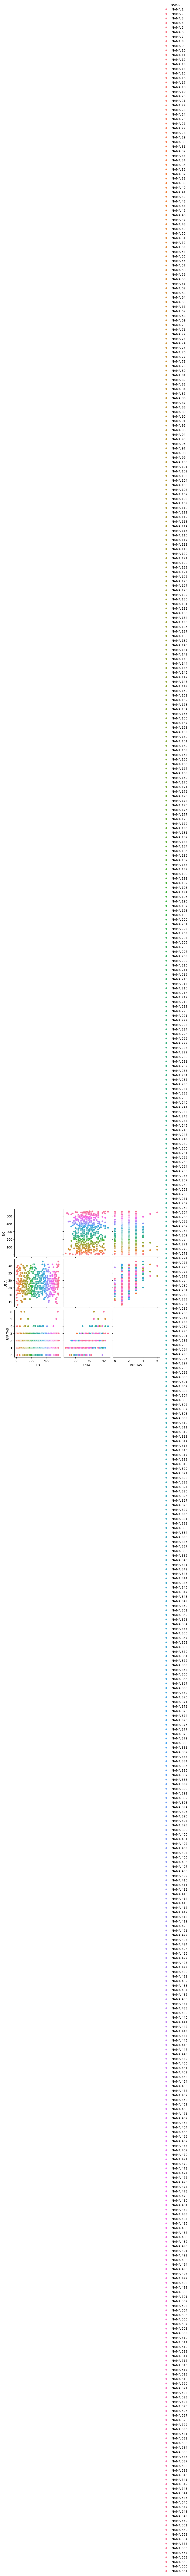

In [ ]:
# Step 1: Import Libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Load the Excel File
file_path = '/content/drive/MyDrive/campuss/data-mining/dataKasus-1.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Check the actual column names
print("Column Names:")
print(data.columns.tolist())

# Step 4: Basic Data Overview
print("First 5 rows of the dataset:")
print(data.head())
print("\nData Description:")
print(data.describe(include='all'))
print("\nData Info:")
print(data.info())

# Step 5: Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Step 6: Handle Missing Values for USIA
# Define a function to clean the USIA data
def clean_age(value):
    if isinstance(value, str):  # Ensure the value is a string
        value = value.lower()  # Convert to lowercase to standardize
        value = value.replace(" th", "").replace(" th ", "").strip()  # Remove " th" and strip whitespace
    return pd.to_numeric(value, errors='coerce')  # Convert to numeric, turn non-convertible to NaN

# Apply the cleaning function
data['USIA'] = data['USIA'].apply(clean_age)

# Fill NaNs with the median age
median_age = data['USIA'].median()  # Calculate median age
data['USIA'].fillna(median_age, inplace=True)  # Fill NaNs with median

# Visualize the distributions of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(data['USIA'], bins=20, kde=True)  # Plot the cleaned USIA data
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 7: Count Plot for Categorical Features
# Replace 'NAMA' with your actual target variable name
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='NAMA')  # Adjust this based on your target variable
plt.title('Count of PE vs Non PE')
plt.xlabel('PE/Non PE')
plt.ylabel('Count')
plt.show()

# Step 8: Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Pairplot to Explore Relationships
sns.pairplot(data, hue='NAMA')  # Replace with the appropriate categorical target
plt.show()

# Step 10: Prepare Data for Training
# Assume 'NAMA' is your target variable and the rest are features
X = data.drop('NAMA', axis=1)  # Drop the target variable
y = data['NAMA']  # Target variable

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

#